In [1]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np

In [2]:
tqdm.pandas()


# NCATS CYP3A4
Dataset from https://opendata.ncats.nih.gov/adme/data

https://pubchem.ncbi.nlm.nih.gov/bioassay/1645841#section=Description

## Assay info

Chemical compounds were tested for their effect on CYP enzyme activities by using P450-Glo (TM) screening systems (Promega Corporation, Madison, WI). These systems provide a luminescent method containing proluciferin substrates and are converted to luciferin products by CYP isozymes. The luciferin products formed are detected with a luciferin detection reagent, and the amount of light produced is proportional to CYP activity. P450-Glo (TM) CYP screening system (Catalog. No. V9890) was used to detect the compounds that interfere in CYP activity. The positive control compound used for CYP assay is quinidine (Sigma-Aldrich, St. Louis, MO).


PUBCHEM_ACTIVITY_OUTCOME: Corresponds to PUBCHEM_ACTIVITY_SCORE. For all inactive compounds, PUBCHEM_ACTIVITY_SCORE is 0. For all active compounds, a score range was given for each curve class type given above. Active antagonist compounds have PUBCHEM_ACTIVITY_SCORE between 40 and 100. 

PUBCHEM_ACTIVITY_SCORE: Average of 5 experimental replicates. Fit_LogAC50 was used for determining relative score and was scaled to each curve class' score range.


In [3]:
df = pd.read_csv("NCATS_CYP_raw/AID_1645841_datatable_all.csv")

/tmp/ipykernel_168983/2645318791.py:1: DtypeWarning: Columns (0,8,9,10,11,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("NCATS_CYP_raw/AID_1645841_datatable_all.csv")


In [4]:
list(df.columns)

['PUBCHEM_RESULT_TAG',
 'PUBCHEM_SID',
 'PUBCHEM_CID',
 'PUBCHEM_ACTIVITY_OUTCOME',
 'PUBCHEM_ACTIVITY_SCORE',
 'PUBCHEM_ACTIVITY_URL',
 'PUBCHEM_ASSAYDATA_COMMENT',
 'Phenotype-Replicate_1',
 'Potency-Replicate_1',
 'Efficacy-Replicate_1',
 'Analysis Comment-Replicate_1',
 'Activity_Score-Replicate_1',
 'Curve_Description-Replicate_1',
 'Fit_LogAC50-Replicate_1',
 'Fit_HillSlope-Replicate_1',
 'Fit_R2-Replicate_1',
 'Fit_InfiniteActivity-Replicate_1',
 'Fit_ZeroActivity-Replicate_1',
 'Fit_CurveClass-Replicate_1',
 'Excluded_Points-Replicate_1',
 'Max_Response-Replicate_1',
 'Activity at 0.0000073560 uM-Replicate_1',
 'Activity at 0.0000367800 uM-Replicate_1',
 'Activity at 0.0000735600 uM-Replicate_1',
 'Activity at 0.0001677464 uM-Replicate_1',
 'Activity at 0.0003678000 uM-Replicate_1',
 'Activity at 0.0007362988 uM-Replicate_1',
 'Activity at 0.00153 uM-Replicate_1',
 'Activity at 0.00368 uM-Replicate_1',
 'Activity at 0.00723 uM-Replicate_1',
 'Activity at 0.00914 uM-Replicate_1'

In [5]:
# first 5 rows are metadata 
df[0:5]

PUBCHEM_RESULT_TAG  PUBCHEM_SID  PUBCHEM_CID  \
0                     RESULT_TYPE          NaN          NaN   
1                    RESULT_DESCR          NaN          NaN   
2                     RESULT_UNIT          NaN          NaN   
3  RESULT_IS_ACTIVE_CONCENTRATION          NaN          NaN   
4       RESULT_ATTR_CONC_MICROMOL          NaN          NaN   

  PUBCHEM_ACTIVITY_OUTCOME  PUBCHEM_ACTIVITY_SCORE PUBCHEM_ACTIVITY_URL  \
0                      NaN                     NaN                  NaN   
1                      NaN                     NaN                  NaN   
2                      NaN                     NaN                  NaN   
3                      NaN                     NaN                  NaN   
4                      NaN                     NaN                  NaN   

   PUBCHEM_ASSAYDATA_COMMENT  \
0                        NaN   
1                        NaN   
2                        NaN   
3                        NaN   
4                        NaN   

                               Phenotype-Replicate_1  \
0                                             STRING   
1  Indicates type of activity observed: inhibitor...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                 Potency-Replicate_1  \
0                                              FLOAT   
1  Concentration at which compound exhibits half-...   
2                                         MICROMOLAR   
3                                               TRUE   
4                                                NaN   

                                Efficacy-Replicate_1  ...  \
0                                              FLOAT  ...   
1  Maximal efficacy of compound, reported as a pe...  ...   
2                                            PERCENT  ...   
3                                                NaN  ...   
4                                                NaN  ...   

     Activity at 0.910 uM-Replicate_5    Activity at 1.182 uM-Replicate_5  \
0                               FLOAT                               FLOAT   
1  % Activity at given concentration.  % Activity at given concentration.   
2                             PERCENT                             PERCENT   
3                                 NaN                                 NaN   
4                            0.909733                             1.18163   

     Activity at 2.302 uM-Replicate_5    Activity at 4.834 uM-Replicate_5  \
0                               FLOAT                               FLOAT   
1  % Activity at given concentration.  % Activity at given concentration.   
2                             PERCENT                             PERCENT   
3                                 NaN                                 NaN   
4                              2.3015                             4.83399   

     Activity at 11.49 uM-Replicate_5    Activity at 23.94 uM-Replicate_5  \
0                               FLOAT                               FLOAT   
1  % Activity at given concentration.  % Activity at given concentration.   
2                             PERCENT                             PERCENT   
3                                 NaN                                 NaN   
4                             11.4937                             23.9433   

     Activity at 57.45 uM-Replicate_5    Activity at 115.4 uM-Replicate_5  \
0                               FLOAT                               FLOAT   
1  % Activity at given concentration.  % Activity at given concentration.   
2                             PERCENT                             PERCENT   
3                                 NaN                                 NaN   
4                              57.447                             115.368   

     Activity at 193.5 uM-Replicate_5    Activity at 288.3 uM-Replicate_5  
0                      

In [6]:
    df = df.drop(labels=list(range(0, 5)), axis=0).reset_index(
        drop=True
    )

In [7]:
df.head()

PUBCHEM_RESULT_TAG  PUBCHEM_SID  PUBCHEM_CID PUBCHEM_ACTIVITY_OUTCOME  \
0                  1  104223880.0     197033.0                   Active   
1                  2   11111456.0    5281670.0                 Inactive   
2                  3   11113977.0    6604832.0             Inconclusive   
3                  4  124879150.0    5280443.0                   Active   
4                  5  124879975.0        836.0                   Active   

   PUBCHEM_ACTIVITY_SCORE                               PUBCHEM_ACTIVITY_URL  \
0                    43.0  http://assay.nih.gov/htsws/rest/display/p450-i...   
1                     0.0  http://assay.nih.gov/htsws/rest/display/p450-i...   
2                    10.0  http://assay.nih.gov/htsws/rest/display/p450-i...   
3                    84.0  http://assay.nih.gov/htsws/rest/display/p450-i...   
4                    63.0  http://assay.nih.gov/htsws/rest/display/p450-i...   

   PUBCHEM_ASSAYDATA_COMMENT Phenotype-Replicate_1 Potency-Replicate_1  \
0                        NaN             Inhibitor              10.684   
1                        NaN              Inactive                 NaN   
2                        NaN             Inhibitor             37.9083   
3                        NaN             Inhibitor              6.0081   
4                        NaN             Inhibitor              3.0112   

  Efficacy-Replicate_1  ... Activity at 0.910 uM-Replicate_5  \
0              136.193  ...                              NaN   
1                  NaN  ...                              NaN   
2              105.983  ...                              NaN   
3              112.724  ...                              NaN   
4              57.7747  ...                              NaN   

  Activity at 1.182 uM-Replicate_5 Activity at 2.302 uM-Replicate_5  \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                              NaN                              NaN   
3                              NaN                              NaN   
4                              NaN                              NaN   

  Activity at 4.834 uM-Replicate_5 Activity at 11.49 uM-Replicate_5  \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                              NaN                              NaN   
3                              NaN                              NaN   
4                              NaN                              NaN   

  Activity at 23.94 uM-Replicate_5 Activity at 57.45 uM-Replicate_5  \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                              NaN                              NaN   
3                              NaN                              NaN   
4                              NaN                              NaN   

  Activity at 115.4 uM-Replicate_5 Activity at 193.5 uM-Replicate_5  \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                              NaN                              NaN   
3                              NaN                              NaN   
4                              NaN                              NaN   

  Activity at 288.3 uM-Replicate_5  
0                              NaN  
1                              NaN  
2                              NaN  
3                              NaN  
4                              NaN  

[5 rows x 203 columns]

In [8]:
# lets look at activity

<Axes: xlabel='PUBCHEM_ACTIVITY_SCORE', ylabel='Count'>

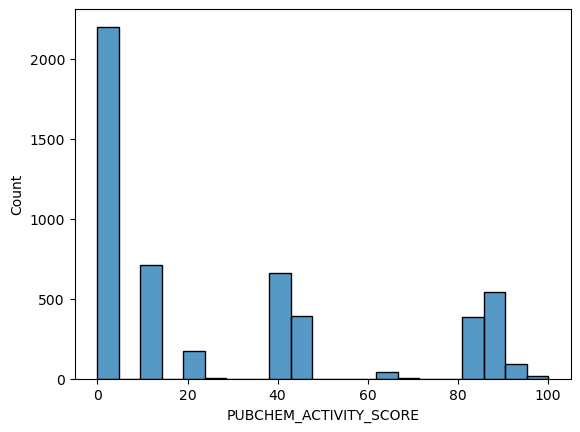

In [9]:
sns.histplot(data=df, x="PUBCHEM_ACTIVITY_SCORE")

<Axes: xlabel='PUBCHEM_ACTIVITY_OUTCOME', ylabel='Count'>

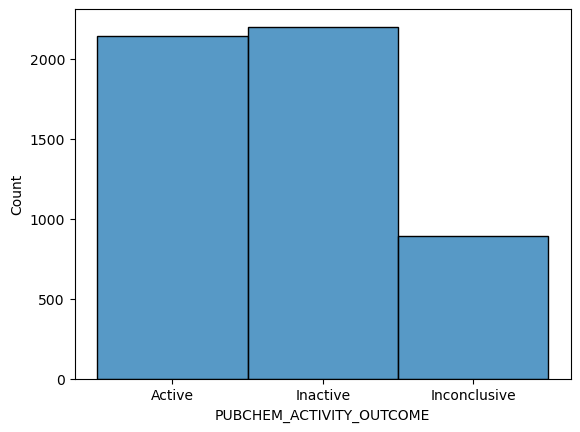

In [10]:
sns.histplot(data=df, x="PUBCHEM_ACTIVITY_OUTCOME")


In [11]:
import matplotlib.pyplot as plt

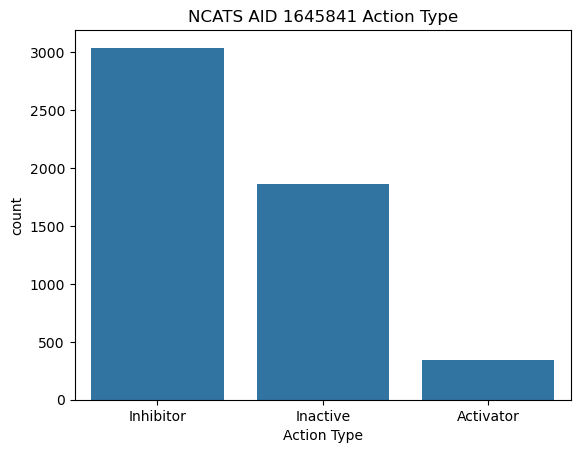

In [12]:
plt.title("NCATS AID 1645841 Action Type")
sns.countplot(data=df, x="Phenotype-Replicate_1")
plt.xlabel("Action Type")
plt.savefig("NCATS_AID_1645841.png")

In [13]:
# clean up the main_dataset

In [14]:
activity_cols = ["PUBCHEM_ACTIVITY_OUTCOME", "PUBCHEM_ACTIVITY_SCORE"]

In [15]:
mol_col = "PUBCHEM_EXT_DATASOURCE_SMILES"
mol_id_cols = ["PUBCHEM_SID", "PUBCHEM_CID"]

In [16]:
len(df)

5242

In [17]:
df = df.dropna(subset="PUBCHEM_CID")

In [18]:
len(df)

5238

In [19]:
df["PUBCHEM_SID"] = df["PUBCHEM_SID"].astype(int)
df["PUBCHEM_CID"] = df["PUBCHEM_CID"].astype(int)

In [20]:
df["PUBCHEM_CID"].to_csv("NCATS_CYP_raw/cids.csv", index=False, header=False)

In [21]:
# import pubchempy as pcp
# import json



In [22]:
# pcp.Compound.from_cid(197033).canonical_smiles

In [23]:
# THIS TAKES A BILLION YEARS

# df["PCSMILES"] = df["PUBCHEM_CID"].progress_apply(lambda x: pcp.Compound.from_cid(x).canonical_smiles)

## OK the PUBCHEM API is so so slow, we need to parallelise

In [24]:
#import dask.dataframe as dd

In [25]:
#from dask.diagnostics import ProgressBar


In [26]:
# dd.from_pandas(df)

In [27]:
# def get_canonical_smiles(cid):
#     try:
#         compound = pcp.Compound.from_cid(cid)
#         return compound.canonical_smiles
#     except Exception as e:
#         return None  # Handle cases where the CID is invalid or the request fails

# ddf = dd.from_pandas(df, npartitions=100)  
# # Apply the function in parallel across partitions using Dask
# ddf['PCSMILES'] = ddf['PUBCHEM_CID'].map_partitions(lambda part: part.apply(get_canonical_smiles), meta=('x', 'object'))

# with ProgressBar():
#     result = ddf.compute()

In [28]:
# result

## OK the PUBCHEM API doesn't even work, 

We will write the CIDs to a file and use ID exchange ENTREZ

In [29]:
pubchem_mapping_file = "./NCATS_CYP_raw/2870917276013973259.txt"

In [30]:
pc_mapping =  pd.read_csv(pubchem_mapping_file, delim_whitespace=True, header=None)

/tmp/ipykernel_168983/3883419428.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  pc_mapping =  pd.read_csv(pubchem_mapping_file, delim_whitespace=True, header=None)


In [31]:
pc_mapping.rename(columns={0:"PUBCHEM_CID", 1:"SMILES"}, inplace=True)

In [32]:
pc_mapping.head()

PUBCHEM_CID                                             SMILES
0       197033    CC1=CC2=C(C=C1)N(C3=C2CN(CC3)C)CCC4=CN=C(C=C4)C
1      5281670   C1=CC(=C(C=C1O)O)C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O
2      6604832  C[C@H]1[C@@H](C(=O)N[C@H](C(=O)N2CCC[C@@H]2C(=...
3      5280443         C1=CC(=CC=C1C2=CC(=O)C3=C(C=C(C=C3O2)O)O)O
4          836                       C1=CC(=C(C=C1CC(C(=O)O)N)O)O

In [33]:
dict_df = pc_mapping.set_index('PUBCHEM_CID')['SMILES'].to_dict()


In [34]:
df["SMILES"] = df["PUBCHEM_CID"].apply(lambda x: dict_df[x])

In [35]:
df

PUBCHEM_RESULT_TAG  PUBCHEM_SID  PUBCHEM_CID PUBCHEM_ACTIVITY_OUTCOME  \
0                     1    104223880       197033                   Active   
1                     2     11111456      5281670                 Inactive   
2                     3     11113977      6604832             Inconclusive   
3                     4    124879150      5280443                   Active   
4                     5    124879975          836                   Active   
...                 ...          ...          ...                      ...   
5237               5238     90341041     11957637                 Inactive   
5238               5239     90341069         4906                 Inactive   
5239               5240     90341160         5593                   Active   
5240               5241     90341654         2968             Inconclusive   
5241               5242     90341795       108107                 Inactive   

      PUBCHEM_ACTIVITY_SCORE  \
0                       43.0   
1                        0.0   
2                       10.0   
3                       84.0   
4                       63.0   
...                      ...   
5237                     0.0   
5238                     0.0   
5239                    42.0   
5240                    10.0   
5241                     0.0   

                                   PUBCHEM_ACTIVITY_URL  \
0     http://assay.nih.gov/htsws/rest/display/p450-i...   
1     http://assay.nih.gov/htsws/rest/display/p450-i...   
2     http://assay.nih.gov/htsws/rest/display/p450-i...   
3     http://assay.nih.gov/htsws/rest/display/p450-i...   
4     http://assay.nih.gov/htsws/rest/display/p450-i...   
...                                                 ...   
5237  http://assay.nih.gov/htsws/rest/display/p450-i...   
5238  http://assay.nih.gov/htsws/rest/display/p450-i...   
5239  http://assay.nih.gov/htsws/rest/display/p450-i...   
5240  http://assay.nih.gov/htsws/rest/display/p450-i...   
5241  http://assay.nih.gov/htsws/rest/display/p450-i...   

      PUBCHEM_ASSAYDATA_COMMENT Phenotype-Replicate_1 Potency-Replicate_1  \
0                           NaN             Inhibitor              10.684   
1                           NaN              Inactive                 NaN   
2                           NaN             Inhibitor             37.9083   
3                           NaN             Inhibitor              6.0081   
4                           NaN             Inhibitor              3.0112   
...                         ...                   ...                 ...   
5237                        NaN              Inactive                 NaN   
5238                        NaN              Inactive                 NaN   
5239                        NaN             Inhibitor              10.684   
5240                        NaN             Inhibitor               1.345   
5241                        NaN             Activator             30.1116   

     Efficacy-Replicate_1  ... Activity at 1.182 uM-Replicate_5  \
0                 136.193  ...                              NaN   
1                     NaN  ...                              NaN   
2                 105.983  ...                              NaN   
3                 112.724  ...                              NaN   
4                 57.7747  ...                              NaN   
...                   ...  ...                              ...   
5237                  NaN  ...                              NaN   
5238                  NaN  ...                              NaN   
5239              100.958  ...                              NaN   
5240              68.4438  ...                              NaN   
5241              70.1788  ...                              NaN   

     Activity at 2.302 uM-Replicate_5 Activity at 4.834 uM-Replicate_5  \
0                                 NaN                              NaN   
1                                 NaN                              NaN   
2                     

In [36]:
# standardisation of SMILES
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.rdBase import BlockLogs
import mols2grid

In [37]:

# from Pat Walters method
def standardize_smiles(smiles):
    try:
        # follows the steps in
        # https://github.com/greglandrum/RSC_OpenScience_Standardization_202104/blob/main/MolStandardize%20pieces.ipynb
        # as described **excellently** (by Greg) in
        # https://www.youtube.com/watch?v=eWTApNX8dJQ
        mol = Chem.MolFromSmiles(smiles)
    
        # removeHs, disconnect metal atoms, normalize the molecule, reionize the molecule
        clean_mol = rdMolStandardize.Cleanup(mol)
    
        # if many fragments, get the "parent" (the actual mol we are interested in) 
        parent_clean_mol = rdMolStandardize.FragmentParent(clean_mol)
    
        # try to neutralize molecule
        uncharger = rdMolStandardize.Uncharger()  # annoying, but necessary as no convenience method exists
        uncharged_parent_clean_mol = uncharger.uncharge(parent_clean_mol)
    
        # note that no attempt is made at reionization at this step
        # nor at ionization at some pH (rdkit has no pKa caculator)
        # the main aim to represent all molecules from different sources
        # in a (single) standard way, for use in ML, catalogue, etc.
    
        te = rdMolStandardize.TautomerEnumerator()  # idem
        taut_uncharged_parent_clean_mol = te.Canonicalize(uncharged_parent_clean_mol)
    
        return Chem.MolToSmiles(taut_uncharged_parent_clean_mol)
    except:
        return pd.NA

In [38]:

with BlockLogs():
    df["CANONICAL_SMILES"] = df["SMILES"].progress_apply(lambda x: standardize_smiles(x))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5238/5238 [00:47<00:00, 109.63it/s]


In [39]:
def smi_to_inchikey(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        return Chem.MolToInchiKey(mol)
    except:
        return pd.NA

In [40]:
# compute inchikeys
with BlockLogs():
    df["INCHIKEY"] = df["CANONICAL_SMILES"].progress_apply(lambda x: smi_to_inchikey(x))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5238/5238 [00:01<00:00, 3889.94it/s]


In [41]:
df.INCHIKEY.isna().sum() # there are a few that couldn't be standardised

np.int64(3)

In [42]:
df.dropna(subset="INCHIKEY")

PUBCHEM_RESULT_TAG  PUBCHEM_SID  PUBCHEM_CID PUBCHEM_ACTIVITY_OUTCOME  \
0                     1    104223880       197033                   Active   
1                     2     11111456      5281670                 Inactive   
2                     3     11113977      6604832             Inconclusive   
3                     4    124879150      5280443                   Active   
4                     5    124879975          836                   Active   
...                 ...          ...          ...                      ...   
5237               5238     90341041     11957637                 Inactive   
5238               5239     90341069         4906                 Inactive   
5239               5240     90341160         5593                   Active   
5240               5241     90341654         2968             Inconclusive   
5241               5242     90341795       108107                 Inactive   

      PUBCHEM_ACTIVITY_SCORE  \
0                       43.0   
1                        0.0   
2                       10.0   
3                       84.0   
4                       63.0   
...                      ...   
5237                     0.0   
5238                     0.0   
5239                    42.0   
5240                    10.0   
5241                     0.0   

                                   PUBCHEM_ACTIVITY_URL  \
0     http://assay.nih.gov/htsws/rest/display/p450-i...   
1     http://assay.nih.gov/htsws/rest/display/p450-i...   
2     http://assay.nih.gov/htsws/rest/display/p450-i...   
3     http://assay.nih.gov/htsws/rest/display/p450-i...   
4     http://assay.nih.gov/htsws/rest/display/p450-i...   
...                                                 ...   
5237  http://assay.nih.gov/htsws/rest/display/p450-i...   
5238  http://assay.nih.gov/htsws/rest/display/p450-i...   
5239  http://assay.nih.gov/htsws/rest/display/p450-i...   
5240  http://assay.nih.gov/htsws/rest/display/p450-i...   
5241  http://assay.nih.gov/htsws/rest/display/p450-i...   

      PUBCHEM_ASSAYDATA_COMMENT Phenotype-Replicate_1 Potency-Replicate_1  \
0                           NaN             Inhibitor              10.684   
1                           NaN              Inactive                 NaN   
2                           NaN             Inhibitor             37.9083   
3                           NaN             Inhibitor              6.0081   
4                           NaN             Inhibitor              3.0112   
...                         ...                   ...                 ...   
5237                        NaN              Inactive                 NaN   
5238                        NaN              Inactive                 NaN   
5239                        NaN             Inhibitor              10.684   
5240                        NaN             Inhibitor               1.345   
5241                        NaN             Activator             30.1116   

     Efficacy-Replicate_1  ... Activity at 4.834 uM-Replicate_5  \
0                 136.193  ...                              NaN   
1                     NaN  ...                              NaN   
2                 105.983  ...                              NaN   
3                 112.724  ...                              NaN   
4                 57.7747  ...                              NaN   
...                   ...  ...                              ...   
5237                  NaN  ...                              NaN   
5238                  NaN  ...                              NaN   
5239              100.958  ...                              NaN   
5240              68.4438  ...                              NaN   
5241              70.1788  ...                              NaN   

     Activity at 11.49 uM-Replicate_5 Activity at 23.94 uM-Replicate_5  \
0                                 NaN                              NaN   
1                                 NaN                              NaN   
2                     

In [43]:
# lets gather up the activities?

In [44]:
activity_cols = [f"Fit_LogAC50-Replicate_{x}" for x in range(1,6)]
activity = df[activity_cols]

In [45]:
activity

Fit_LogAC50-Replicate_1 Fit_LogAC50-Replicate_2 Fit_LogAC50-Replicate_3  \
0                    -4.9713                     NaN                     NaN   
1                    -4.4213                     NaN                     NaN   
2                    -4.4213                     NaN                     NaN   
3                    -5.2213                     NaN                     NaN   
4                    -5.5213                     NaN                     NaN   
...                      ...                     ...                     ...   
5237                     NaN                     NaN                     NaN   
5238                     NaN                     NaN                     NaN   
5239                 -4.9713                     NaN                     NaN   
5240                 -5.8713                     NaN                     NaN   
5241                 -4.5213                     NaN                     NaN   

     Fit_LogAC50-Replicate_4 Fit_LogAC50-Replicate_5  
0                        NaN                     NaN  
1                        NaN                     NaN  
2                        NaN                     NaN  
3                        NaN                     NaN  
4                        NaN                     NaN  
...                      ...                     ...  
5237                     NaN                     NaN  
5238                     NaN                     NaN  
5239                     NaN                     NaN  
5240                     NaN                     NaN  
5241                     NaN                     NaN  

[5238 rows x 5 columns]

In [46]:
# lets not use activities for now

In [47]:
# ok, clean up DF, and segement into active and inactives,

In [48]:
keep_cols = ["CANONICAL_SMILES", "INCHIKEY", "PUBCHEM_ACTIVITY_OUTCOME", "PUBCHEM_CID"]

In [49]:
clean = df[keep_cols]

In [50]:
clean["dataset"] = "ncats_adme_aid1645841"
clean["data_type"] = "assay"

/tmp/ipykernel_168983/2033778496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["dataset"] = "ncats_adme_aid1645841"
/tmp/ipykernel_168983/2033778496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["data_type"] = "assay"


In [51]:
clean["active"] = clean["PUBCHEM_ACTIVITY_OUTCOME"] == "Active"

/tmp/ipykernel_168983/212178452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["active"] = clean["PUBCHEM_ACTIVITY_OUTCOME"] == "Active"


In [52]:
mols2grid.display(clean, smiles_col="CANONICAL_SMILES")

MolGridWidget()

In [53]:
clean.head()
clean["common_name"] = pd.NA
clean["action_type"] = "inhibitor"

/tmp/ipykernel_168983/3481227677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["common_name"] = pd.NA
/tmp/ipykernel_168983/3481227677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["action_type"] = "inhibitor"


In [54]:
clean.to_csv("./processed/ncats_adme_aid1645841.csv", index=False)

In [55]:
# spot checked structures with a few pubchem CIDs, looks like translation went ok